In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data=datasets.load_digits()
x=data.images
y=data.target
#Preprocess the data
x=x.reshape((x.shape[0],8,8,1))# (number of samples, dimension of image) [CNN takes 4 dimension]
x=x.astype("float32")/255 # Normalize
y=to_categorical(y) # Visulaize

In [3]:
# Split the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# Create the model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(8,8,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [4]:
#Compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [5]:
#Define early stopping and model checkpoint
earlystop=EarlyStopping(monitor="val_loss",patience=10)
best_weights=ModelCheckpoint("best_weights.h5",save_best_only=True,monitor="val_loss",mode="min")
#Fit the model and train it
history=model.fit(x_train,y_train,epochs=50,batch_size=20,validation_data=(x_test,y_test),callbacks=[earlystop,best_weights])

Epoch 1/50
72/72 [==============================] - 1s 5ms/step - loss: 2.2778 - accuracy: 0.1573 - val_loss: 2.2274 - val_accuracy: 0.5194
Epoch 2/50
64/72 [=========================>....] - ETA: 0s - loss: 2.1177 - accuracy: 0.5328

C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/72 [==============================] - 0s 3ms/step - loss: 2.0958 - accuracy: 0.5393 - val_loss: 1.9081 - val_accuracy: 0.5639
Epoch 3/50
72/72 [==============================] - 0s 3ms/step - loss: 1.6235 - accuracy: 0.7335 - val_loss: 1.3140 - val_accuracy: 0.7639
Epoch 4/50
72/72 [==============================] - 0s 3ms/step - loss: 1.1017 - accuracy: 0.7968 - val_loss: 0.8503 - val_accuracy: 0.8639
Epoch 5/50
72/72 [==============================] - 0s 3ms/step - loss: 0.7861 - accuracy: 0.8546 - val_loss: 0.6204 - val_accuracy: 0.8556
Epoch 6/50
72/72 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.8664 - val_loss: 0.4940 - val_accuracy: 0.8917
Epoch 7/50
72/72 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8782 - val_loss: 0.4080 - val_accuracy: 0.8944
Epoch 8/50
72/72 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.8928 - val_loss: 0.3522 - val_accuracy: 0.9028
Epoch 9/50
72/72 [=============

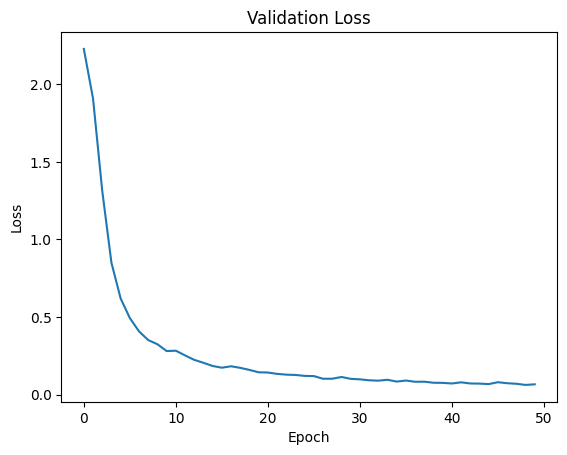

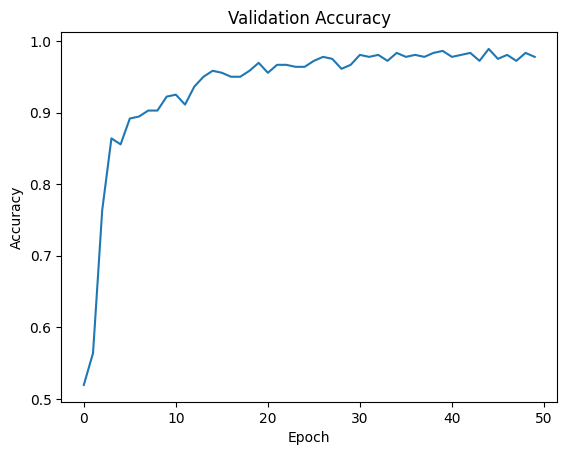

In [6]:
#Plotting the validation loss and accuracy
plt.plot(history.history["val_loss"])
plt.title("Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()
plt.plot(history.history["val_accuracy"])
plt.title("Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [7]:
#Loading weights that yeild best validation accuracy
model.load_weights("best_weights.h5")

In [8]:
#Evaluate the model on the set
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print("Test Loss : ",test_loss)
print("Test Accuracy : ",test_acc)

Test Loss :  0.0633547306060791
Test Accuracy :  0.9833333492279053
